# Plots the NINO Sea Surface Temperature indices (data from the [Bureau of Meteorology](http://www.bom.gov.au)) and the real-time Southern Oscillation Index (SOI) from [LongPaddock](https://www.longpaddock.qld.gov.au/seasonalclimateoutlook/southernoscillationindex/)

[Nicolas Fauchereau](mailto:nicolas.fauchereau@gmail.com)

In [27]:
%matplotlib inline

In [28]:
import os, sys

import pandas as pd
from datetime import datetime, timedelta
from cStringIO import StringIO
import requests

import matplotlib as mpl
from matplotlib import pyplot as plt

from IPython.display import Image

### set up proxies here if needed

In [29]:
proxies = {}
# proxies['http'] = 'url:port'

### path where the figures will be saved

In [30]:
dpath = os.path.join(os.environ['HOME'], 'operational/ICU/indices/figures')

In [31]:
today = datetime.utcnow() - timedelta(15)

### Get the SOI, set the datetime index

In [32]:
url = 'http://www.longpaddock.qld.gov.au/seasonalclimateoutlook/southernoscillationindex/soidatafiles/DailySOI1933-1992Base.txt'

In [33]:
r = requests.get(url, proxies=proxies)

In [34]:
soi = pd.read_table(StringIO(r.content), sep='\s*', engine='python')

In [35]:
index = [datetime(year,1,1) + timedelta(day-1) for year, day in soi.loc[:,['Year','Day']].values]

In [36]:
soi.index = index

In [37]:
soi = soi.loc[:,['SOI']]

In [38]:
soi.head()

,SOI
1999-01-01,14.02
1999-01-02,18.79
1999-01-03,6.35
1999-01-04,2.48
1999-01-05,7.65


### calculates 30 days and 90 days rolling averages

In [39]:
soi['soirm1'] = pd.rolling_mean(soi.SOI, 30)
soi['soirm3'] = pd.rolling_mean(soi.SOI, 90)

In [40]:
soi = soi.ix['2013':]

In [41]:
soi.tail()

,SOI,soirm1,soirm3
2015-04-03,2.79,-12.117333,-6.304222
2015-04-04,9.53,-11.616000,-6.183000
2015-04-05,7.72,-11.160333,-6.128444
2015-04-06,-2.63,-10.658667,-6.213222
2015-04-07,-26.54,-10.710333,-6.482667


### set up the matplotlib parameters for plotting

In [42]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years   = YearLocator()
months  = MonthLocator()
mFMT = DateFormatter('%b')
yFMT = DateFormatter('\n\n%Y')

In [43]:
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2

### plots the Southern Oscillation Index

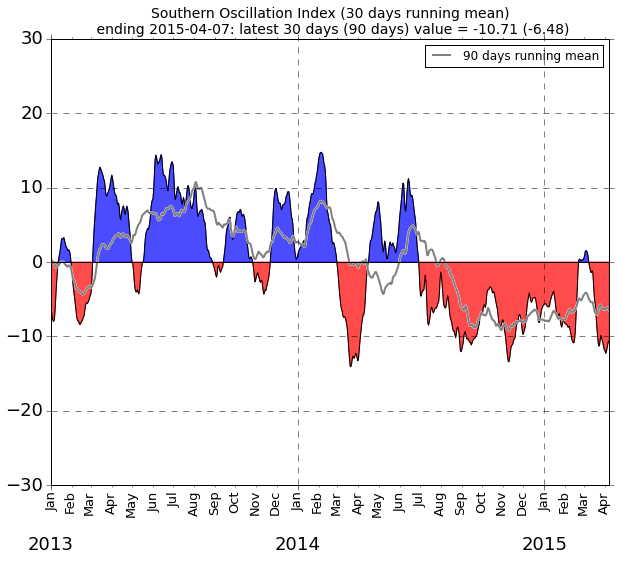

In [44]:
f, ax = plt.subplots(figsize=(10,8))

ax.fill_between(soi.index, soi.soirm1, 0, (soi.soirm1 >= 0), color='b', alpha=0.7, interpolate=True)
ax.fill_between(soi.index, soi.soirm1, 0, (soi.soirm1 < 0), color='r', alpha=0.7, interpolate=True)

ax.plot(soi.index, soi.soirm1, c='k')

ax.plot(soi.index, soi.soirm3, c='w', lw=2.5)
ax.plot(soi.index, soi.soirm3, c='0.5', lw=2, label='90 days running mean')
ax.legend()

ax.axhline(0, color='k')
ax.set_ylim(-30,30)
ax.grid(linestyle='--')

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_formatter(mFMT)
ax.xaxis.set_major_formatter(yFMT)

[label.set_fontsize(13) for label in ax.get_xminorticklabels()]
[label.set_rotation(90) for label in ax.get_xminorticklabels()]
[label.set_fontsize(18) for label in ax.get_xmajorticklabels()]
[label.set_fontsize(18) for label in ax.get_ymajorticklabels()]

ax.set_title("Southern Oscillation Index (30 days running mean)\
\n ending {0:}: latest 30 days (90 days) value = {1:<4.2f} ({2:<4.2f})".\
             format(soi.index[-1].strftime("%Y-%m-%d"), soi.iloc[-1,1], soi.iloc[-1,2]))

f.savefig(os.path.join(dpath, 'SOI_LP_realtime_plot.png'), dpi=200)

### Plots the NINO SST Indices

In [45]:
Image(url='http://www1.ncdc.noaa.gov/pub/data/cmb/teleconnections/nino-regions.gif')

processing NINO3.4
processing NINO3
processing NINO4


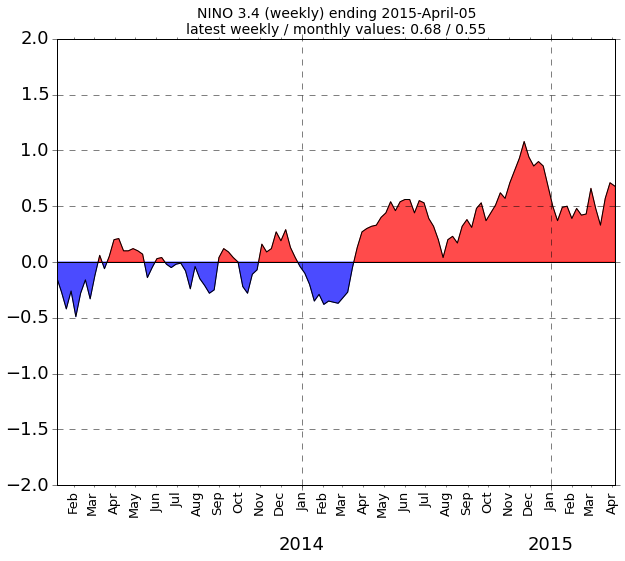

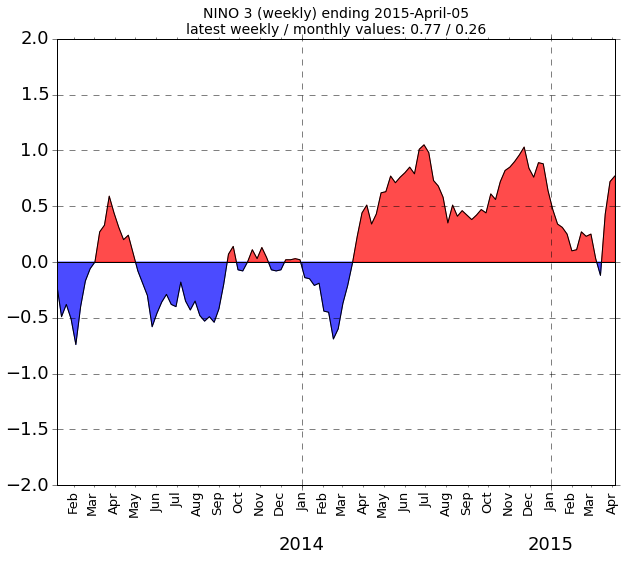

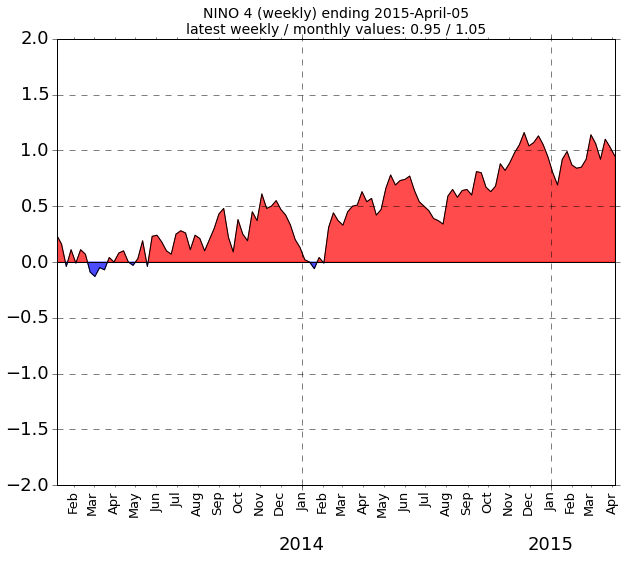

In [46]:
for nino in ["3.4", "3", "4"]:
    
    print("processing NINO{}".format(nino))

    url = "http://www.bom.gov.au/climate/enso/nino_%s.txt" % (nino)
    r = requests.get(url, proxies=proxies)
    data = pd.read_table(StringIO(r.content), sep=',', header=None, index_col=1, \
                         parse_dates=True, names=['iDate','SST'])
    data = data.ix['2013':]
    lastmonth = data.loc[today.strftime("%Y-%m"),'SST'].mean()
    
    f, ax = plt.subplots(figsize=(10, 8))

    ax.fill_between(data.index, data.SST, 0, (data.SST >= 0), color='r', alpha=0.7, interpolate=True)
    ax.fill_between(data.index, data.SST, 0, (data.SST < 0), color='b', alpha=0.7, interpolate=True)

    ax.plot(data.index, data.SST, c='k')

    ax.axhline(0, color='k')
    ax.set_ylim(-2,2)
    ax.grid(linestyle='--')

    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_formatter(mFMT)
    ax.xaxis.set_major_formatter(yFMT)

    [label.set_fontsize(13) for label in ax.get_xminorticklabels()]
    [label.set_rotation(90) for label in ax.get_xminorticklabels()]
    [label.set_fontsize(18) for label in ax.get_xmajorticklabels()]
    [label.set_fontsize(18) for label in ax.get_ymajorticklabels()]

    ax.set_title("NINO {} (weekly) ending {}\nlatest weekly / monthly values: {:<4.2f} / {:<4.2f}"\
                 .format(nino, data.index[-1].strftime("%Y-%B-%d"), data.iloc[-1,-1], lastmonth))
    
    f.savefig(os.path.join(dpath, 'NINO{}_realtime_plot.png'.format(nino)))